<a href="https://colab.research.google.com/github/labibaa/Forecasting-Inflation/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o
from h2o.automl import H2OAutoML


In [ ]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8wvfetop
  JVM stdout: /tmp/tmp8wvfetop/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8wvfetop/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_5fy1xn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetf_1 - cpi_month.csv to datasetf_1 - cpi_month.csv


In [ ]:
data = h2o.import_file('datasetf_1 - cpi_month.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train, valid = data.split_frame(ratios=[0.8], seed=42)


In [ ]:
target_column = 'Inflation'


In [ ]:
predictors = data.columns
predictors.remove(target_column)

In [ ]:
automl = H2OAutoML(max_runtime_secs=3600)  # Adjust the max runtime as needed




In [ ]:
automl.train(x=predictors, y=target_column, training_frame=train, validation_frame=valid)



AutoML progress: |
14:54:18.505: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.


14:54:19.714: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 99.0.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
leaderboard = automl.leaderboard
print(leaderboard)

model_id                                                     rmse        mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_5_AutoML_2_20230612_145418  0.274562  0.0753842  0.197774  0.0369445                 0.0753842
GBM_grid_1_AutoML_2_20230612_145418_model_10             0.276271  0.0763256  0.197581  0.0370492                 0.0763256
XGBoost_grid_1_AutoML_2_20230612_145418_model_12         0.279448  0.078091   0.196588  0.0384227                 0.078091
XGBoost_grid_1_AutoML_2_20230612_145418_model_238        0.279564  0.0781558  0.186185  0.036741                  0.0781558
XGBoost_grid_1_AutoML_2_20230612_145418_model_190        0.280827  0.0788636  0.19096   0.0374586                 0.0788636
StackedEnsemble_BestOfFamily_7_AutoML_2_20230612_145418  0.284151  0.0807419  0.202099  0.0379391                 0.0807419
StackedEnsemble_BestOfFamily_4_AutoML_2_20230612_145418  0.287143  0.0824514  0.20801   0.0385597                 0.0824514
XGBoost_g

In [ ]:
best_model = automl.leader


In [ ]:
mae= 0.085

In [ ]:
leaderboard_df = leaderboard.as_data_frame()


In [ ]:
predictions = best_model.predict(predictors)


In [ ]:
import pandas as pd

predictions_df = predictions.as_data_frame()

In [ ]:
actual_values_df = test[y].as_data_frame()


In [ ]:
comparison_df = pd.concat([actual_values_df, predictions_df], axis=1)
comparison_df.columns = ['Actual', 'Predicted']


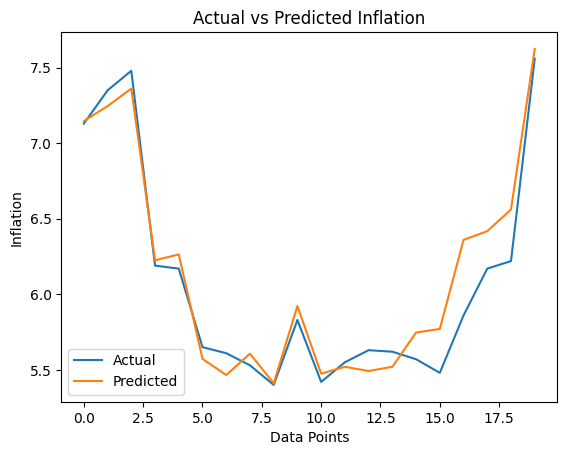

In [ ]:
import matplotlib.pyplot as plt

plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Inflation')
plt.title('Actual vs Predicted Inflation')
plt.legend()
plt.show()
